In [18]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [19]:
# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

df=pd.get_dummies(df,drop_first=True)
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [29]:
y_pred=model.predict(x_test)

In [30]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Classification report",classification_report(y_test,y_pred))

Accuracy 0.8100558659217877
Classification report               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



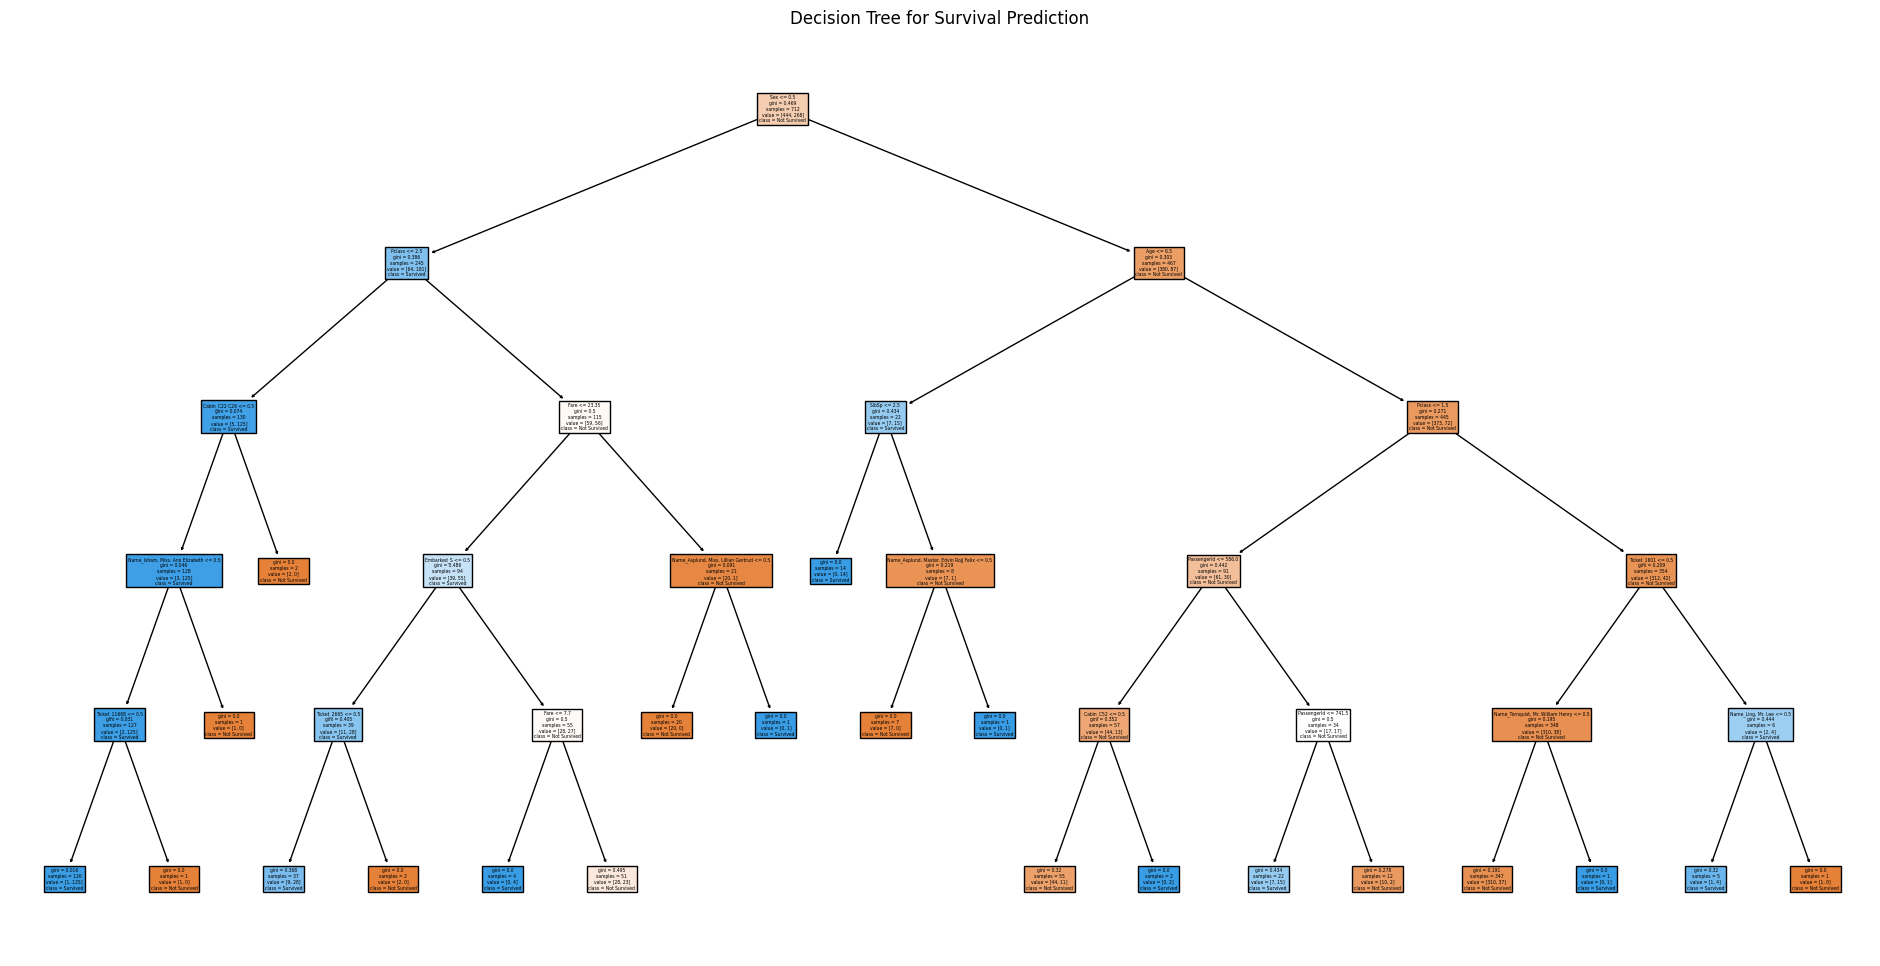

In [32]:
plt.figure(figsize=(24, 12))
tree.plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree for Survival Prediction")
plt.show()